In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# 读取数据
data = np.loadtxt('data2.txt', delimiter=',')
X = data[:, :-1]  # 特征
y = data[:, -1]   # 目标值

In [3]:
# 特征缩放（正则化）
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# 划分训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# 添加偏置项（截距项）
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_val = np.c_[np.ones(X_val.shape[0]), X_val]

# 定义逻辑回归函数
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta, lambd=0):
    m = len(y)
    h = sigmoid(X.dot(theta))
    term1 = -y.dot(np.log(h))
    term2 = -(1 - y).dot(np.log(1 - h))
    reg_term = (lambd / (2 * m)) * np.sum(theta[1:]**2)
    cost = (1 / m) * (term1 + term2) + reg_term
    return cost

def gradient_descent(X, y, theta, alpha, iterations, lambd=0):
    m = len(y)
    history = []
    for i in range(iterations):
        h = sigmoid(X.dot(theta))
        gradient = (1 / m) * X.T.dot(h - y)
        reg_term = (lambd / m) * theta
        reg_term[0] = 0  # 不对偏置项应用正则化
        gradient += reg_term
        theta -= alpha * gradient
        cost = compute_cost(X, y, theta, lambd)
        history.append(cost)
    return theta, history

# 一般梯度下降
alpha = 0.1
iterations = 1000
theta_general, cost_history_general = gradient_descent(X_train, y_train, np.zeros(X_train.shape[1]), alpha, iterations)

# L2正则化梯度下降
alpha_reg = 0.1
iterations_reg = 1000
lambd_reg = 0.1  # 正则化参数
theta_reg, cost_history_reg = gradient_descent(X_train, y_train, np.zeros(X_train.shape[1]), alpha_reg, iterations_reg, lambd_reg)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


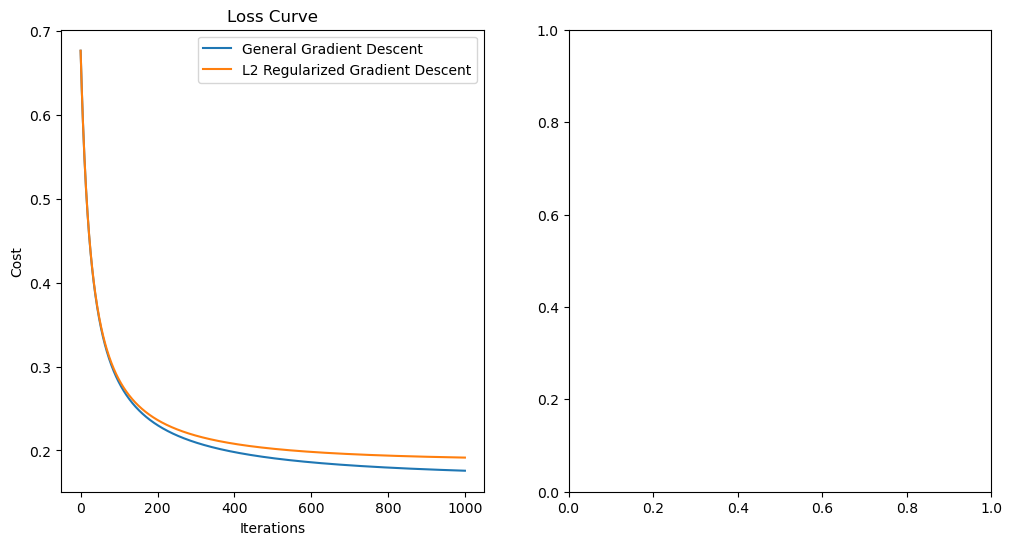

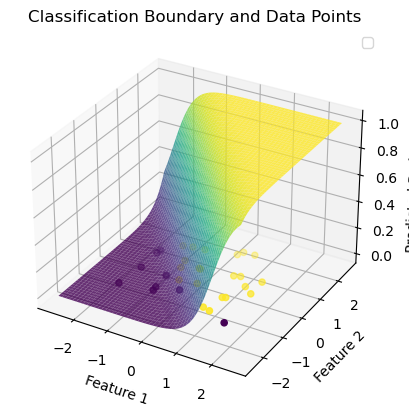

In [13]:
# 可视化损失曲线
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(iterations), cost_history_general, label='General Gradient Descent')
plt.plot(range(iterations_reg), cost_history_reg, label='L2 Regularized Gradient Descent')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.title('Loss Curve')

# 可视化分类直线和数据点的三维图
plt.subplot(1, 2, 2)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 散点图
ax.scatter(X_val[:, 1], X_val[:, 2],c=y_val)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Classification Boundary')
# 构建分类直线
x_values = np.linspace(min(X_val[:, 1]) - 1, max(X_val[:, 1]) + 1, 50)
y_values = np.linspace(min(X_val[:, 2]) - 1, max(X_val[:, 2]) + 1, 50)
X_mesh, Y_mesh = np.meshgrid(x_values, y_values)
Z = np.zeros(X_mesh.shape)

for i in range(X_mesh.shape[0]):
    for j in range(X_mesh.shape[1]):
        features = np.array([1, X_mesh[i, j], Y_mesh[i, j]])
        Z[i, j] = sigmoid(features.dot(theta_reg))

ax.plot_surface(X_mesh, Y_mesh, Z, alpha=0.8, cmap='viridis')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Predicted Probability')

plt.title('Classification Boundary and Data Points')
plt.show()

In [7]:
X_val

array([[ 1.        , -0.43415649, -0.36278249],
       [ 1.        , -1.60736862, -0.31507682],
       [ 1.        , -1.70042734, -1.23933351],
       [ 1.        , -0.17672918, -0.76588887],
       [ 1.        , -0.75392586, -1.10328278],
       [ 1.        , -1.62497511,  0.48760951],
       [ 1.        , -0.78042096, -0.93923898],
       [ 1.        ,  1.20190067,  0.19371884],
       [ 1.        ,  1.56075461, -1.51418452],
       [ 1.        , -1.60224763,  0.63834112],
       [ 1.        ,  0.25914553,  1.44433023],
       [ 1.        , -0.22029098,  0.35619356],
       [ 1.        , -0.26788246,  0.37172177],
       [ 1.        , -0.70239602,  0.1736574 ],
       [ 1.        ,  1.46947562,  0.59152637],
       [ 1.        ,  0.69152826,  0.49337794],
       [ 1.        , -0.94934675,  1.20358601],
       [ 1.        , -0.78437891,  0.51855329],
       [ 1.        ,  0.86065022,  0.55490359],
       [ 1.        ,  1.02063763, -0.49595429],
       [ 1.        , -0.82939191, -0.346